# Women's E-Commerce Clothing Reviews

---
Dataset: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews


In [1]:
from google.colab import files
uploaded = files.upload()

Saving Womens Clothing E-Commerce Reviews.csv to Womens Clothing E-Commerce Reviews.csv


In [291]:
import pandas as pd
df = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')

## Data Understanding

In [292]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [282]:
df.shape

(23486, 11)

In [283]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['unnamed:_0', 'clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   unnamed:_0               23486 non-null  int64 
 1   clothing_id              23486 non-null  int64 
 2   age                      23486 non-null  int64 
 3   title                    19676 non-null  object
 4   review_text              22641 non-null  object
 5   rating                   23486 non-null  int64 
 6   recommended_ind          23486 non-null  int64 
 7   positive_feedback_count  23486 non-null  int64 
 8   division_name            23472 non-null  object
 9   department_name          23472 non-null  object
 10  class_name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [285]:
null_data = df.isnull().sum()
null_data.sort_values(ascending=False)

title                      3810
review_text                 845
class_name                   14
department_name              14
division_name                14
positive_feedback_count       0
recommended_ind               0
rating                        0
age                           0
clothing_id                   0
unnamed:_0                    0
dtype: int64

Rata-rata rating semua produk 4.196031678446734


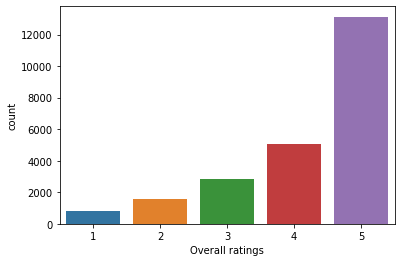

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df.rating)
plt.xlabel('Overall ratings')

rate_mean = df['rating'].mean()
print("Rata-rata rating semua produk", rate_mean)

Rata-rata umur pembeli :  43.198543813335604
Median umur pembeli :  41.0


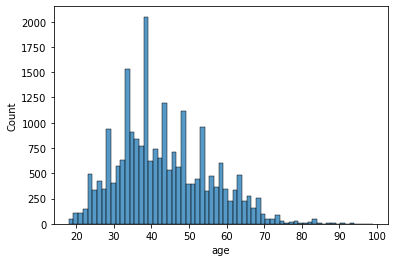

In [287]:
sns.histplot(x=df.age)
age_mean = df['age'].mean()
age_med = df['age'].median()
print("Rata-rata umur pembeli : ", age_mean)
print("Median umur pembeli : ", age_med)

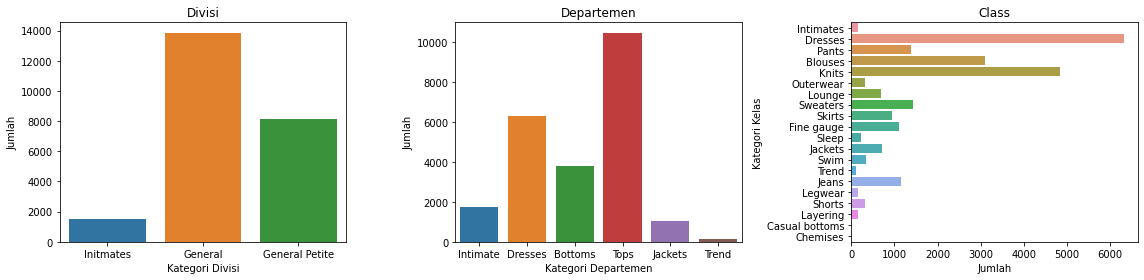

In [288]:
f, ax = plt.subplots(1, 3, figsize=(16,4), sharey=False)
sns.countplot(x=df.division_name, ax=ax[0])
ax[0].set_title("Divisi")
ax[0].set_xlabel("Kategori Divisi")
ax[0].set_ylabel("Jumlah")
sns.countplot(x=df.department_name, ax=ax[1])
ax[1].set_title("Departemen")
ax[1].set_xlabel("Kategori Departemen")
ax[1].set_ylabel("Jumlah")
sns.countplot(y=df.class_name, ax=ax[2])
ax[2].set_title("Class")
ax[2].set_xlabel("Jumlah")
ax[2].set_ylabel("Kategori Kelas")
plt.tight_layout()
plt.show()

## Data Preprocessing


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Overall ratings category')

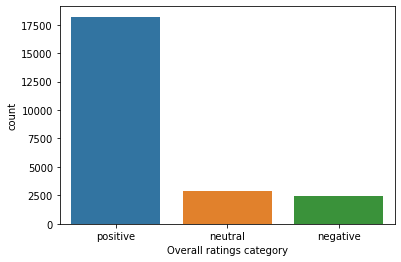

In [289]:
df['ratings_category'] = df.rating.replace({
    1:'negative',
    2:'negative',
    3:'neutral',
    4:'positive',
    5:'positive'
})
sns.countplot(df.ratings_category)
plt.xlabel('Overall ratings category')

In [290]:
df = df[['review_text', 'ratings_category']]
df

,review_text,ratings_category
0,Absolutely wonderful - silky and sexy and comf...,positive
1,Love this dress! it's sooo pretty. i happene...,positive
2,I had such high hopes for this dress and reall...,neutral
3,"I love, love, love this jumpsuit. it's fun, fl...",positive
4,This shirt is very flattering to all due to th...,positive
...,...,...
23481,I was very happy to snag this dress at such a ...,positive
23482,"It reminds me of maternity clothes. soft, stre...",neutral
23483,"This fit well, but the top was very see throug...",neutral
23484,I bought this dress for a wedding i have this ...,neutral


In [252]:
df.isnull().sum()

review_text         0
ratings_category    0
dtype: int64

In [253]:
df = df.dropna(how='any', axis=0)
df.isnull().sum()

review_text         0
ratings_category    0
dtype: int64

In [254]:
df.shape

(22641, 2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


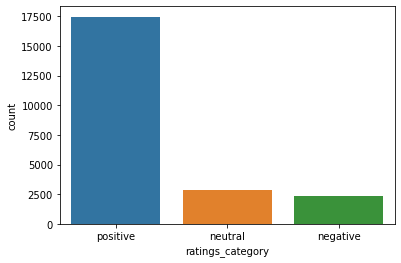

In [255]:
sns.countplot(df.ratings_category)

In [256]:
df_positive = df[(df['ratings_category'] == 'positive')]
df_positive.shape

(17448, 2)

In [257]:
df_neutral = df[(df['ratings_category'] == 'neutral')]
df_neutral.shape

(2823, 2)

In [258]:
df_negative = df[(df['ratings_category'] == 'negative')]
df_negative.shape

(2370, 2)

In [259]:
df_positive = df_positive[:10000]
df_positive.shape

(10000, 2)

In [260]:
df_baru = df_positive.append(df_neutral, ignore_index=True)
df_baru = df_baru.append(df_negative, ignore_index=True)
df_baru

,review_text,ratings_category
0,Absolutely wonderful - silky and sexy and comf...,positive
1,Love this dress! it's sooo pretty. i happene...,positive
2,"I love, love, love this jumpsuit. it's fun, fl...",positive
3,This shirt is very flattering to all due to th...,positive
4,I aded this in my basket at hte last mintue to...,positive
...,...,...
15188,I was very excited to find a fun and lightweig...,negative
15189,Before i ordered this i noted the other review...,negative
15190,What drew me to this shirt was the beautiful s...,negative
15191,This dress is so cute in the photo and fit tru...,negative


In [261]:
for i in range(0, 3):
    df_baru = df_baru.append(df_neutral, ignore_index=True)
    df_baru = df_baru.append(df_negative, ignore_index=True)

df_baru

,review_text,ratings_category
0,Absolutely wonderful - silky and sexy and comf...,positive
1,Love this dress! it's sooo pretty. i happene...,positive
2,"I love, love, love this jumpsuit. it's fun, fl...",positive
3,This shirt is very flattering to all due to th...,positive
4,I aded this in my basket at hte last mintue to...,positive
...,...,...
30767,I was very excited to find a fun and lightweig...,negative
30768,Before i ordered this i noted the other review...,negative
30769,What drew me to this shirt was the beautiful s...,negative
30770,This dress is so cute in the photo and fit tru...,negative


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


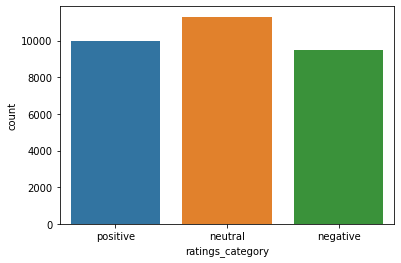

In [262]:
sns.countplot(df_baru.ratings_category)

In [263]:
category = pd.get_dummies(df_baru['ratings_category'])
df_baru = pd.concat([df_baru, category], axis = 1)
df_baru = df_baru.drop(['ratings_category'],  axis = 1)
df_baru

,review_text,negative,neutral,positive
0,Absolutely wonderful - silky and sexy and comf...,0,0,1
1,Love this dress! it's sooo pretty. i happene...,0,0,1
2,"I love, love, love this jumpsuit. it's fun, fl...",0,0,1
3,This shirt is very flattering to all due to th...,0,0,1
4,I aded this in my basket at hte last mintue to...,0,0,1
...,...,...,...,...
30767,I was very excited to find a fun and lightweig...,1,0,0
30768,Before i ordered this i noted the other review...,1,0,0
30769,What drew me to this shirt was the beautiful s...,1,0,0
30770,This dress is so cute in the photo and fit tru...,1,0,0


## Rock n Roll

In [266]:
review = df_baru['review_text'].values.astype(str)
category = df_baru[['negative','neutral','positive']].values

In [267]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (review, category, test_size = 0.2)

In [269]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 10000, oov_token = 'x')
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

seq_train = tokenizer.texts_to_sequences(x_train)
seq_test = tokenizer.texts_to_sequences(x_test)

padded_train = pad_sequences(seq_train)
padded_test = pad_sequences(seq_test)

In [274]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = 10000, output_dim = 16),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_44 (Embedding)     (None, None, 16)          160000    
_________________________________________________________________
lstm_43 (LSTM)               (None, 128)               74240     
_________________________________________________________________
dense_84 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_31 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_85 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_32 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 3)               

In [275]:
num_epochs = 10
history = model.fit(
    padded_train,
    y_train,
    epochs = num_epochs,
    validation_data = (padded_test, y_test),
    verbose= 2
)

Epoch 1/10
770/770 - 27s - loss: 1.0242 - accuracy: 0.4402 - val_loss: 0.7368 - val_accuracy: 0.6003
Epoch 2/10
770/770 - 24s - loss: 0.7938 - accuracy: 0.5917 - val_loss: 0.6850 - val_accuracy: 0.6416
Epoch 3/10
770/770 - 25s - loss: 0.6870 - accuracy: 0.6609 - val_loss: 0.6325 - val_accuracy: 0.7223
Epoch 4/10
770/770 - 25s - loss: 0.6179 - accuracy: 0.7154 - val_loss: 0.6425 - val_accuracy: 0.7074
Epoch 5/10
770/770 - 25s - loss: 0.5154 - accuracy: 0.7920 - val_loss: 0.5274 - val_accuracy: 0.8110
Epoch 6/10
770/770 - 25s - loss: 0.4451 - accuracy: 0.8325 - val_loss: 0.5416 - val_accuracy: 0.8582
Epoch 7/10
770/770 - 24s - loss: 0.4015 - accuracy: 0.8578 - val_loss: 0.4364 - val_accuracy: 0.8786
Epoch 8/10
770/770 - 24s - loss: 0.3558 - accuracy: 0.8795 - val_loss: 0.5054 - val_accuracy: 0.8764
Epoch 9/10
770/770 - 24s - loss: 0.3117 - accuracy: 0.9001 - val_loss: 0.5515 - val_accuracy: 0.8846
Epoch 10/10
770/770 - 25s - loss: 0.2797 - accuracy: 0.9114 - val_loss: 0.4887 - val_accura

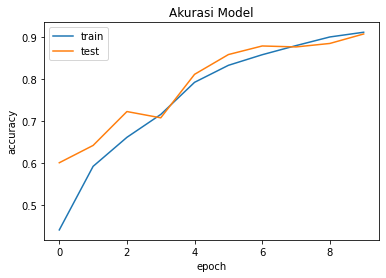

In [276]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

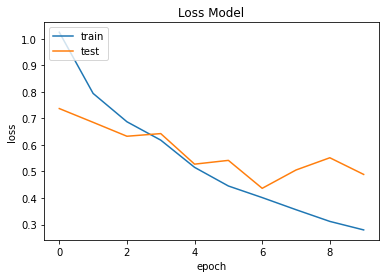

In [277]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()